#0 https://minerandodados.com.br/mineracao-de-textos-7-tecnicas/ Site de técnicas úteis para mineirar os dados

#1 https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0 -- LDA - TowardsScience Autor:Shashank Kapadia

#2 https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html -- doc

#3 https://sigmoidal.ai/como-criar-uma-wordcloud-em-python/  -- WorldClouds ## 
#4 http://tirandolicoesdetudo.com.br/criando-uma-nuvem-de-palavras-wordcloud-com-dados-do-meu-cv/ -- WorldCloud ##

#5 https://www.youtube.com/watch?v=iQ1bfDMCv_c&list=PLf6b7z7NwdGVMXPEvoJu64jxtE58q4CH8&index=3&t=9s - Videos da ALICE ZHAO##
https://github.com/adashofdata/nlp-in-python-tutorial - 2018


#6 https://gist.github.com/alopes/5358189 - lista de StopWords em português com correspondências. 


#7 https://medium.com/@viniljf/utilizando-processamento-de-linguagem-natural-para-criar-um-sumariza%C3%A7%C3%A3o-autom%C3%A1tica-de-textos-775cb428c84e

#8 - https://medium.com/somos-tera/como-modelar-t%C3%B3picos-atrav%C3%A9s-de-latent-dirichlet-allocation-lda-atrav%C3%A9s-da-biblioteca-gensim-1fa17357ad4b -- 2020

#9 http://nltk.sourceforge.net/doc/pt-br/tokenize.html

#10 https://stackoverflow.com/questions/5511708/adding-words-to-nltk-stoplist

#11 https://stackabuse.com/removing-stop-words-from-strings-in-python/ -- Outro jeito de remover as stopwords

In [4]:
#python 3 and python 2 #para puxar as bibliotecas que estejam disponíveis na versões. 
from __future__ import print_function

In [5]:
#Bibliotecas principais
import numpy  as np
import pandas as pd
import os
import csv

#Mapeamento de texto - Processamento do Corpus
import re
import nltk
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster
from sklearn.cluster import KMeans


# Visualization and Analysis - Visualuização e análises
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
%matplotlib inline

import seaborn            as sns
from sklearn.metrics      import silhouette_samples, silhouette_score
from wordcloud            import WordCloud

In [6]:
from nltk import sent_tokenize, word_tokenize, pos_tag
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

language = 'portuguese'

words=0
for words in stopwords.words(language):
        print(words)
        
print("\n")
print('Quantidade de Stopwords: \n', len(words))


de
a
o
que
e
é
do
da
em
um
para
com
não
uma
os
no
se
na
por
mais
as
dos
como
mas
ao
ele
das
à
seu
sua
ou
quando
muito
nos
já
eu
também
só
pelo
pela
até
isso
ela
entre
depois
sem
mesmo
aos
seus
quem
nas
me
esse
eles
você
essa
num
nem
suas
meu
às
minha
numa
pelos
elas
qual
nós
lhe
deles
essas
esses
pelas
este
dele
tu
te
vocês
vos
lhes
meus
minhas
teu
tua
teus
tuas
nosso
nossa
nossos
nossas
dela
delas
esta
estes
estas
aquele
aquela
aqueles
aquelas
isto
aquilo
estou
está
estamos
estão
estive
esteve
estivemos
estiveram
estava
estávamos
estavam
estivera
estivéramos
esteja
estejamos
estejam
estivesse
estivéssemos
estivessem
estiver
estivermos
estiverem
hei
há
havemos
hão
houve
houvemos
houveram
houvera
houvéramos
haja
hajamos
hajam
houvesse
houvéssemos
houvessem
houver
houvermos
houverem
houverei
houverá
houveremos
houverão
houveria
houveríamos
houveriam
sou
somos
são
era
éramos
eram
fui
foi
fomos
foram
fora
fôramos
seja
sejamos
sejam
fosse
fôssemos
fossem
for
formos
forem
serei
será
seremos


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#Coleta de Dados
data_df = pd.read_csv('./datasets/docs_gospels_todos.csv',sep=';', encoding = 'utf-8')
data_df.columns = map(str.lower, data_df.columns)

In [8]:
#Verificar início
data_df.head()

,caps,texts
0,Mateus 1,Registro da genealogia de Jesus Cristo filho d...
1,2,A Visita dos Magos 1 Depois que Jesus nasceu e...
2,3,1 Naqueles dias surgiu João Batista pregando n...
3,4,1 Então Jesus foi levado pelo Espírito ao dese...
4,5,As Bem-aventuranças (Lc 6.20-23) 1 Vendo as mu...


In [9]:
#Verificar o final
data_df.tail(6)

,caps,texts
85,16,“Eu lhes tenho dito tudo isso para que vocês n...
86,17,Depois de dizer isso Jesus olhou para o céu e ...
87,18,Tendo terminado de orar Jesus saiu com os seus...
88,19,Jesus é Condenado à Crucificação 1 Então Pilat...
89,20,A Ressurreição (Mt 28.1-10 Mc 16.1-8 Lc 24.1-1...
90,21,Jesus e a Pesca Maravilhosa 1 Depois disso Jes...


In [10]:
#Dados do arquivo
print('Infomações gerais do Dataframe gerado: \n')
data_df.info()
print('\n')
print('linhas e colunas: ', data_df.shape)

Infomações gerais do Dataframe gerado: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   caps    91 non-null     object
 1   texts   91 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


linhas e colunas:  (91, 2)


In [11]:
#definindo o corpus
corpus = data_df['texts'].tolist()
corpus[5][0:500]

'A Ajuda aos Necessitados 1 “Tenham o cuidado de não praticar suas ‘obras de justiça’ diante dos outros para serem vistos por eles. Se fizerem isso vocês não terão nenhuma recompensa do Pai celestial. 2 “Portanto quando você der esmola não anuncie isso com trombetas como fazem os hipócritas nas sinagogas e nas ruas a fim de serem honrados pelos outros. Eu lhes garanto que eles já receberam sua plena recompensa. 3 Mas quando você der esmola que a sua mão esquerda não saiba o que está fazendo a dir'

In [12]:
# removes a list of words (ie. stopwords) from a tokenized list.
def removeWords(listOfTokens, listOfWords):
    return [token for token in listOfTokens if token not in listOfWords]

# applies stemming to a list of tokenized words
def applyStemming(listOfTokens, stemmer):
    return [stemmer.stem(token) for token in listOfTokens]

# removes any words composed of less than 2 or more than 21 letters
def twoLetters(listOfTokens):
    twoLetterWord = []
    for token in listOfTokens:
        if len(token) <= 2 or len(token) >= 31:
            twoLetterWord.append(token)
    return twoLetterWord


In [13]:
stopwords = nltk.corpus.stopwords.words(language)
other_words = [line.rstrip('\n') for line in open('./lists/stopwords.txt', encoding='utf-8')] # Load .txt file line by line
stopwords.append(other_words)

print(other_words)

def remove_mystopwords():
    tokens_filtered = sentence.split(" ")
    tokens_filtered = [word for word in text_tokens if not word in other_words]
    return (" ").join(tokens_filtered)



['de ', 'a ', 'o ', 'que ', 'e ', 'do ', 'da ', 'em ', 'um ', 'para ', 'é ', 'com ', 'não ', 'uma ', 'os ', 'no ', 'se ', 'na ', 'por ', 'mais ', 'as ', 'dos ', 'como ', 'mas ', 'foi ', 'ao ', 'ele ', 'das ', 'tem ', 'à ', 'seu ', 'sua ', 'ou ', 'ser ', 'quando ', 'muito ', 'há ', 'nos ', 'já ', 'está ', 'eu ', 'também ', 'só ', 'pelo ', 'pela ', 'até ', 'isso ', 'ela ', 'entre ', 'era ', 'depois ', 'sem ', 'mesmo ', 'aos ', 'ter ', 'seus ', 'quem ', 'nas ', 'me ', 'esse ', 'eles ', 'estão ', 'você ', 'tinha ', 'foram ', 'essa ', 'num ', 'nem ', 'suas ', 'meu ', 'às ', 'minha ', 'têm ', 'numa ', 'pelos ', 'elas ', 'havia ', 'seja ', 'qual ', 'será ', 'nós ', 'tenho ', 'lhe ', 'deles ', 'essas ', 'esses ', 'pelas ', 'este ', 'fosse ', 'dele ', 'tu ', 'te ', 'vocês ', 'vos ', 'lhes ', 'meus ', 'minhas', 'teu ', 'tua', 'teus', 'tuas', 'nosso ', 'nossa', 'nossos', 'nossas', 'dela ', 'delas ', 'esta ', 'estes ', 'estas ', 'aquele ', 'aquela ', 'aqueles ', 'aquelas ', 'isto ', 'aquilo ', 'es

In [18]:
# Remove punctuation tutorial 5
import re 
import string 
texts=data_df['texts'].tolist()

#defindo os corpus
def clean_text_docs_round1(texts): 
        for doc in texts:
            texts= texts.lower()
            texts= re.sub('[.*.,/?!:;"`´()\']', ' ',texts)
            texts= re.sub('[-|0-9]', '', texts)
            texts= re.sub('[%s]' % re.escape(string.punctuation), ' ', texts)
            texts= re.sub('\w*\d\w*', ' ', texts)
            texts = re.sub('[.*‘’“”]', ' ', texts)
            texts = re.sub('\r', ' ', texts)
            texts = re.sub('\n', ' ', texts)
            return texts
    
round1 = lambda x: clean_text_docs_round1(x)
    

#def clean_text_docs_round1(texts):
def processCorpus(corpus,language):
    stopwords = nltk.corpus.stopwords.words(language)
    param_stemmer = SnowballStemmer(language)
    other_words = [line.rstrip('\n') for line in open('lists/stopwords.txt')] # Load .txt file line by line
    
    for document in corpus:
        index = corpus.index(document)
        corpus[index] = corpus[index].replace(u'\ufffd', '8')   # Replaces the ASCII '�' symbol with '8'
        corpus[index] = corpus[index].replace(',', '')          # Removes commas
        corpus[index] = corpus[index].replace(';', '')          #removes dot commas
        corpus[index] = corpus[index].rstrip('\n')              # Removes line breaks
        corpus[index] = corpus[index].casefold()                # Makes all letters lowercase
        
        corpus[index] = re.sub('\W_',' ', corpus[index])        # removes specials characters and leaves only words
        corpus[index] = re.sub("\S*\d\S*"," ", corpus[index])   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
        corpus[index] = re.sub("\S*@\S*\s?"," ", corpus[index]) # removes emails and mentions (words with @)
        corpus[index] = re.sub(r'http\S+', '', corpus[index])   # removes URLs with http
        corpus[index] = re.sub(r'www\S+', '', corpus[index])    # removes URLs with www

        listOfTokens = word_tokenize(corpus[index])
        twoLetterWord = twoLetters(listOfTokens)

        listOfTokens = removeWords(listOfTokens, stopwords)
        listOfTokens = removeWords(listOfTokens, twoLetterWord)
        listOfTokens = removeWords(listOfTokens, other_words)
        
        listOfTokens = applyStemming(listOfTokens, param_stemmer)
        listOfTokens = removeWords(listOfTokens, other_words)

        corpus[index]   = " ".join(listOfTokens)
        corpus[index] = unidecode(corpus[index])
    
    return corpus


In [19]:
#Atualizar documento com o texto atualizado fase 1
dados_limpos = pd.DataFrame(data_df.texts.apply(round1))
dados_limpos.head(10)

,texts
0,registro da genealogia de jesus cristo filho d...
1,a visita dos magos depois que jesus nasceu em...
2,naqueles dias surgiu joão batista pregando no...
3,então jesus foi levado pelo espírito ao deser...
4,as bemaventuranças lc vendo as multidões ...
5,a ajuda aos necessitados tenham o cuidado de...
6,não julguem para que vocês não sejam julgado...
7,quando ele desceu do monte grandes multidões ...
8,entrando jesus num barco atravessou o mar e f...
9,chamando seus doze discípulos deulhes autorid...


In [20]:
#Ver corpus
language = 'portuguese'
corpus = processCorpus(corpus, language)
#corpus[2][0:5000] Escolha uma parte do corpus e printa
corpus[0:91][0:500000]

['registr genealog jesus crist filh dav filh abraa abraa ger isaqu isaqu ger jac jac ger jud irma jud ger perez zer cuj ma tam perez ger esrom esrom ger ara ara ger aminadab aminadab ger naassom naassom ger salmom salmom ger boaz cuj ma raab boaz ger obed cuj ma rut obed ger jess jess ger rei dav dav ger saloma cuj ma sid mulh uri saloma ger roboa roboa ger abi abi ger asa asa ger josaf josaf ger jora jora ger uzi uzi ger jota jota ger acaz acaz ger ezequ ezequ ger manasses manasses ger amom amom ger jos jos ger jeconias irma temp exili babilon exili babilon jecon ger salatiel salatiel ger zorobabel zorobabel ger abiud abiud ger eliaquim eliaquim ger azor azor ger sadoqu sadoqu ger aquim aquim ger eliud eliud ger eleaz eleaz ger mata mata ger jac jac ger jos mar mar nasc jesus cham crist assim tod catorz geraco abraa dav catorz dav exili babilon catorz exili crist nasciment jesus crist assim nasciment jesus crist mar ma promet casament jos antes uniss achou-s grav espirit sant ser jos 

In [ ]:
print("Tamanho do Corpus: ",len(corpus))

In [ ]:
corpus = data_df['texts'].tolist()

In [ ]:
import nltk
language = 'portuguese'
nltk.download('stopwords')
nltk.download('punkt')
all_stopwords = nltk.corpus.stopwords.words(language)

other_words = [line.rstrip('\n') for line in open('./lists/stopwords.txt', encoding='utf-8')] # Load .txt file line by line
all_stopwords.append(other_words)

print(other_words)

In [21]:
import spacy
sp = spacy.load('pt_core_web_md')

all_stopwords = sp.Defaults.stop_words
all_stopwords |= {'de ', 'a ', 'o ', 'que ', 'e ', 'do ', 
                  'da ', 'em ', 'um ', 'para ', 'é ', 'com ', 
                  'não ', 'uma ', 'os ', 'no ', 'se ', 'na ', 
                  'por ', 'mais ', 'as ', 'dos ', 'como ', 'mas ',
                  'foi ', 'ao ', 'ele ', 'das ', 'tem ', 'à ', 
                  'seu ', 'sua ', 'ou ', 'ser ', 'quando ', 'muito ', 
                  'há ', 'nos ', 'já ', 'está ', 'eu ', 'também ', 
                  'só ', 'pelo ', 'pela ', 'até ', 'isso ', 'ela ', 
                  'entre ', 'era ', 'depois ', 'sem ', 'mesmo ', 'aos ',
                  'ter ', 'seus ', 'quem ', 'nas ', 'me ', 'esse ', 'eles ', 
                  'estão ', 'você ', 'tinha ', 'foram ', 'essa ', 'num ', 
                  'nem ', 'suas ', 'meu ', 'às ', 'minha ', 'têm ', 'numa ',
                  'pelos ', 'elas ', 'havia ', 'seja ', 'qual ', 'será ',
                  'nós ', 'tenho ', 'lhe ', 'deles ', 'essas ', 'esses ',
                  'pelas ', 'este ', 'fosse ', 'dele ', 'tu ', 'te ',
                  'vocês ', 'vos ', 'lhes ', 'meus ', 'minhas', 'teu ', 'tua', 'teus', 
                  'tuas', 'nosso ', 'nossa', 'nossos', 'nossas', 'dela ', 'delas ', 'esta ', 
                  'estes ', 'estas ', 'aquele ', 'aquela ', 'aqueles ', 'aquelas ', 'isto ',
                  'aquilo ', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 
                  'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 
                  'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 
                  'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera',
                  'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver',
                  'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos',
                  'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora',
                  'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 
                  'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 
                  'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha',
                  'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei',
                  'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam', 'perguntar', 'disse', 'lhes', 'digo-vos',
                  'dizer', 'havia'}

text = corpus[0:90].tolist()
text_tokens = word_tokenize(text)
tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]

print(tokens_without_sw)

OSError: [E050] Can't find model 'pt_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [ ]:
#Criar uma WordCloud pra realizar uma análise Exploratória  Exemplo de como importar do corpus #data_samples = data[:n_samples]
corpus = data_df['texts'].tolist()
textos = data_df['texts'].tolist()
#textos = corpus[:90] 
all_words = []
all_words =  " ".join(s for s in textos)
    
from wordcloud import WordCloud, ImageColorGenerator
wordcloud2 = WordCloud(stopwords=all_words, max_font_size=100, width = 1520, height = 535,max_words=500000).generate(all_words)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()
#wordcloud.to_file("gospels_wordclouds2.png") #Salva quando tiver certeza que está ok."""

In [109]:
#Amazenar os dados em um formato pickle para ulilizado posteriormente
import pickle
dados_limpos.to_pickle('./models/dados_limpos2.pkl')
#corpus.to_pickle('./models/corpus.pkl')

In [132]:
#passar para arquivo de Texto #https://stackoverflow.com/questions/31247198/python-pandas-write-content-of-dataframe-into-text-file
#import pandas as pd
#import numpy as np
#import xlrd
#import os

#texts= np.savetxt(r'C:/Users/Klemer/Documents/TCC Klemer_codigos/models/dados_limpos.txt', dados_limpos.values, fmt='%d', delimiter='\t') 


In [25]:
# Apply a second round of cleaning
#def clean_text_round2(texts): #Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
   # texts = re.sub('[.*‘’“”]', '', texts)
   # texts = re.sub('\r', '', texts)
   # texts = re.sub('\n', '', texts)
   # return texts

#round2 = lambda x: clean_text_round2(x)

In [26]:
# Dar um novo update no texto
#dados_limpos = pd.DataFrame(data_df.texts.apply(round2))
#dados_limpos.head(10)

In [44]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(40, 0)

91 rows


,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
ger,0.918096,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
exil,0.100226,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
jos,0.099862,0.072835,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.050124,0.000000,0.000000
dav,0.077129,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.036953,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
babilon,0.075169,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
catorz,0.075169,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
cuj,0.069006,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.035776,0.000000,0.000000,0.000000
jac,0.069006,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.052710,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
mar,0.056298,0.023953,0.000000,0.138279,0.0,0.0,0.0,0.143343,0.026973,0.0,...,0.023513,0.0,0.0,0.0,0.0,0.000000,0.000000,0.032968,0.156385,0.051219
crist,0.050290,0.025675,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.025204,0.0,0.0,0.0,0.0,0.030777,0.000000,0.000000,0.027939,0.000000


In [45]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
ger,0.918096,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
exil,0.100226,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
jos,0.099862,0.072835,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050124,0.0,0.0
dav,0.077129,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.036953,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
babilon,0.075169,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [46]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 1)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
menin,0.0,0.413810,0.0,0.0,0.0,0.0,0.0,0.0,0.093198,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
herod,0.0,0.352513,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
bel,0.0,0.273906,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
mag,0.0,0.273906,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05857
egit,0.0,0.255852,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [47]:
# first 5 words with highest weight on document 0:
final_df.T.nlargest(5, 2)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
batiz,0.0,0.0,0.488986,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
joa,0.0,0.0,0.210669,0.072045,0.0,0.0,0.000000,0.0,0.028106,0.028038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080057
arvor,0.0,0.0,0.135819,0.000000,0.0,0.0,0.260705,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
jord,0.0,0.0,0.135819,0.116119,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
surg,0.0,0.0,0.132239,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [139]:
# first 5 words with highest weight on document {}:
final_df.T.nlargest(5, 32)

# first 5 words with highest weight on document {}:
final_df.T.nlargest(5, 63)

# first 5 words with highest weight on document {} :
final_df.T.nlargest(5, 80)

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
lazar,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.267573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mart,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.053515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
jesus,0.026771,0.013445,0.068834,0.254169,0.022428,0.0,0.014553,0.257808,0.226445,0.015131,...,0.254017,0.244258,0.065373,0.000000,0.047894,0.065383,0.309680,0.262411,0.263264,0.302038
morr,0.000000,0.028968,0.000000,0.000000,0.000000,0.0,0.000000,0.069432,0.032525,0.000000,...,0.057609,0.000000,0.000000,0.000000,0.000000,0.000000,0.023829,0.020192,0.000000,0.061976
diss,0.010944,0.041223,0.023449,0.099908,0.034382,0.0,0.000000,0.181142,0.185141,0.000000,...,0.136634,0.102789,0.050108,0.030847,0.114210,0.000000,0.158246,0.095780,0.209265,0.220487


In [25]:
#import re 
#import nltk
##from nltk import sent_tokenize, word_tokenize, pos_tag
#stopwords= (nltk.corpus.stopwords.words)

#for r, map in re_map.texts():
    #texts_tokens = corpus['texts'].str.split()
    #for i,e in enumerate(d):
            #corpus['texts'] = re.sub(r, map, e)

#text_tokens = word_tokenize(corpus[index])
#tokens_without_sw = [word for word in text_tokens if not word in listOfTokens]
#print("Tokens: \n",tokens_without_sw)

NameError: name 'index' is not defined

In [51]:
from nltk import word_tokenize,sent_tokenize
frases = corpus[0:91]
frases_quebradas = frases.str.lower().split()
palavras = set() 

for palavra in (frases_quebradas):
    palavras.update(frases) 
    return(" , ".join(palavras))


print("Palavras: \t", palavras)

"""    
#textos_quebrados = frases.str.lower().str.split()
#palavras = set()
#for palavra in textos_quebrados:
    #palavras.update(palavra)

#print(palavras)    
#tradutor = {palavra: indice for palavra, indice in zip(palavras, indices)}
#vetores_de_texto = [vetorizar_textos(textos, tradutor) for texto in textos_quebrados]
#print(tradutor) 
 """

AttributeError: 'list' object has no attribute 'str'

In [1]:
"""
from nltk import FreqDist
frequencia = FreqDist(corpus)

#import numpy as np
#import matplotlib.pyplot as plt

#palavras = frequencia.keys()
#y_pos = np.arange(len(corpus[index]))
contagem = frequencia.values()
plt.bar(y_pos, contagem, align='center', alpha=0.7)
plt.xticks(y_pos, palavras)
plt.ylabel('Frequencia')
plt.title('Frequencia das palavras na frase')
plt.show()
 """

NameError: name 'corpus' is not defined

In [52]:
#Criar uma WordCloud pra realizar uma análise Exploratória 
texts = dados_limpos['texts'].tolist()
all_texts = []
all_texts =  " ".join(s for s in texts)

#def RemoviStopWords(all_texts):
    #all_texts = all_texts.lower()
    #stop_words = set(nltk.corpus.stopwords.words("language"))
    #other_words = [line.rstrip('\n') for line in open('lists/stopwords.txt')] # Load .txt file line by line
    #palavras = [i for i in all_texts.str.split() if not i in other_words]
    #return (" , ".join(palavras))
#print(palavras)

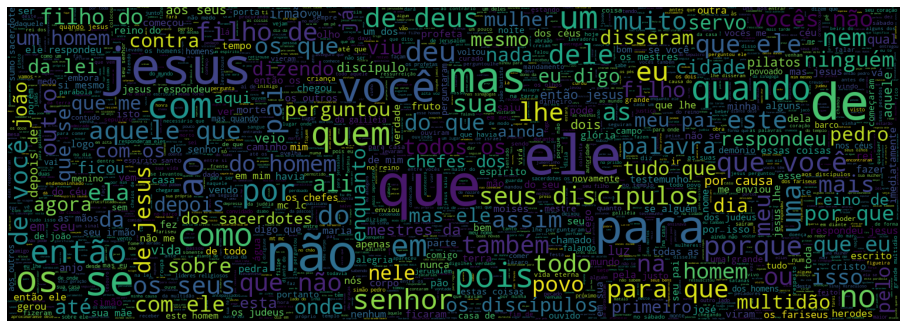

In [53]:
#Criar uma WordCloud pra realizar uma análise Exploratória 
from wordcloud import WordCloud, ImageColorGenerator
wordcloud = WordCloud(stopwords = other_words,max_font_size=100, width = 1520, height = 535,max_words=500000).generate(all_texts)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#wordcloud.to_file("gospels_wordclouds.png") #Salva quando tiver certeza que está ok."""

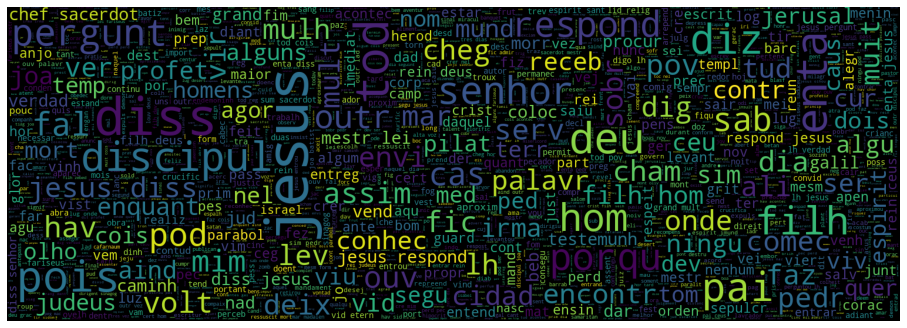

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Klemer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Klemer\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['digo', 'havia', 'ser', 'ter', 'têm'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


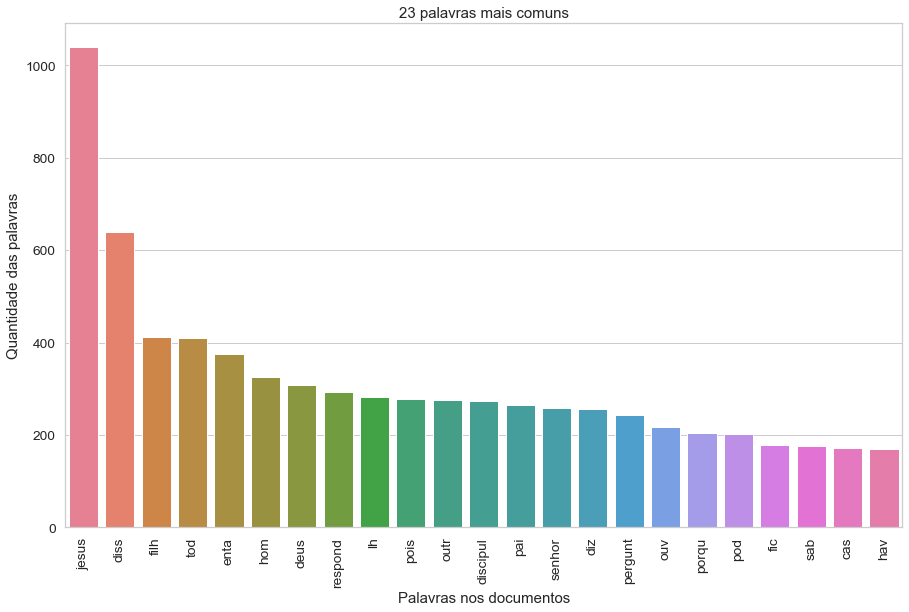

In [37]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


n_samples = 500000
n_features = 2000
n_components = 23
n_top_words = 20


from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

language = 'portuguese'


# Helper function
def plot_20_palavras_mais_comuns(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    palavras_tokenize = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(palavras_tokenize))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(palavras_tokenize, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:23]
    palavras_tokenize = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(palavras_tokenize)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='23 palavras mais comuns')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, palavras_tokenize, rotation=90) 
    plt.xlabel('Palavras nos documentos')
    plt.ylabel('Quantidade das palavras')
    plt.show()
    #plt.save_to_file("23 palavras mais comuns.png")
    
#importar as stopwordsem portugues    
stop_words = (nltk.corpus.stopwords.words('portuguese'))
other_words = [line.rstrip('\n') for line in open('lists/stopwords.txt',encoding='utf-8')] # Load .txt file line by line
stop_words.extend(other_words)


# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words=stop_words)
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(corpus)
# Visualise the 20 most common words
plot_20_palavras_mais_comuns(count_data, count_vectorizer)


In [46]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    palavras_tokenize = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopicos #%d:" % topic_idx)
        print(" ".join([palavras_tokenize[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 23
number_words = 20
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1, max_iter=22,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42)

lda.fit(count_data)
# Print the topics found by the LDA model
print("Topicos encontrados via LDA:")
print_topics(lda, count_vectorizer, number_words)
plt.figure(figsize=(16,9))
plt.show()
#plt.save_to_file("Topicos_encontrados_via_LDA.png")

Topicos encontrados via LDA:

Topicos #0:
pai jesus mim diss conhec porqu cre lh envi pod respond lance espirit hom ajust tod obedec far paz deus

Topicos #1:
jesus diss pergunt respond enta discipul pedr outr diz hom pois tod fal senhor porqu filh judeus pai fic hav

Topicos #2:
filh jesus diss enta porqu outr grand pedr discipul trezent sacerdot senhor volt gerac mund tod deus crist viv diz

Topicos #3:
ger irrepreens procl negoc desculp flaut mant grav naassom obtev moment pec acha descendent aflic livra ser arrend cura dig

Topicos #4:
diss jesus puseram dinh cur encarregaram influenc entrar relat jesusb pod tid quer safr saiss naquel traze saib saem leva

Topicos #5:
assim devolv estabul arranc cois desperdic forc ofert cef dest inclinando expuls aromat calcul encontrar aquim moedinh perfeit jud tirou

Topicos #6:
jesus diss enta hom tod filh outr respond discipul senhor diz deus lh pois pedr sab ouv cham pod pergunt

Topicos #7:
jesus filh diss pai respond mim senhor tod deus ent

<Figure size 1152x648 with 0 Axes>

In [44]:
print("\nTopics in LDA model:")
#tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model:


C:\Users\Klemer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'tf_vectorizer' is not defined

In [43]:
#Analizando o modelo
import time
%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared= sklearn_lda.prepare(lda, count_data, count_vectorizer)
    
    with open(LDAvis_data_filepath, 'w') as f:
        pickle.dump(LDAvis_prepared, f)
        
    #load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath) as f:
        
        LDAvis_prepared = pickle.load(f)
        pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

C:\Users\Klemer\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Wall time: 0 ns


TypeError: write() argument must be str, not bytes